In [20]:
# Dl framwork - tensorflow, keras a backend 
import tensorflow as tf
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings('ignore')

In [8]:
model = Sequential()
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# 3rd Fully Connected Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Output Layer
model.add(Dense(3))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_9 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_10 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 384)        

In [9]:
# Compile the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [11]:
training_set=train_datagen.flow_from_directory('Data/train',target_size=(224,224),batch_size=32,class_mode='categorical')
test_set=test_datagen.flow_from_directory('Data/test',target_size=(224,224),batch_size=32,class_mode='categorical')

Found 706 images belonging to 3 classes.
Found 227 images belonging to 3 classes.


In [12]:
img_dims = 150
epochs = 15
batch_size = 32

In [13]:
#### Fitting the model
history = model.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/15
22/22 [==============================] - 29s 1s/step - loss: 1.1376 - accuracy: 0.3531 - val_loss: 1.1005 - val_accuracy: 0.3527
Epoch 2/15
22/22 [==============================] - 29s 1s/step - loss: 1.0852 - accuracy: 0.4050 - val_loss: 1.1286 - val_accuracy: 0.3482
Epoch 3/15
22/22 [==============================] - 29s 1s/step - loss: 1.0867 - accuracy: 0.3778 - val_loss: 1.1119 - val_accuracy: 0.3482
Epoch 4/15
22/22 [==============================] - 30s 1s/step - loss: 1.0859 - accuracy: 0.3947 - val_loss: 1.1061 - val_accuracy: 0.3571
Epoch 5/15
22/22 [==============================] - 33s 2s/step - loss: 1.0846 - accuracy: 0.3828 - val_loss: 1.1196 - val_accuracy: 0.3571
Epoch 6/15
22/22 [==============================] - 33s 2s/step - loss: 1.0842 - accuracy: 0.4006 - val_loss: 1.1077 - val_accuracy: 0.3571
Epoch 7/15
22/22 [==============================] - 30s 1s/step - loss: 1.0858 - accuracy: 0.3961 - val_loss: 1.1073 - val_accuracy: 0.3482
Epoch 8/15
22/22 [==

vascular lesion


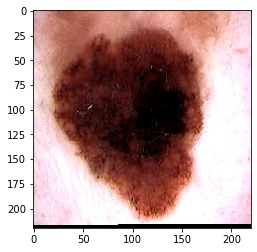

In [26]:
def pred(path):
    t_img = image.load_img(path, target_size=(220,220))
    img = plt.imshow(t_img)
    t_img=np.expand_dims(t_img,axis=0)
    result = model.predict(t_img)
    prediction = result[0]
    classes=training_set.class_indices
    prediction=list(prediction)
    classes=['malignant','squamous cell carcinoma','vascular lesion']
    output=zip(classes,prediction)
    output=dict(output)
    
    if output["malignant"] == 1.0:
        print("Melanoma")
    elif output["squamous cell carcinoma"] ==1.0:
        print("squamous cell carcinoma")
    else:
        print("vascular lesion")
    

pred('data\Test\malignant\ISIC_4523382.jpg')

vascular lesion


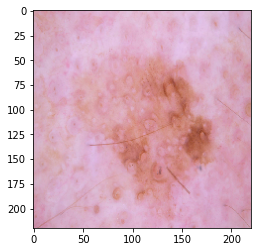

In [30]:
pred('data\Test\squamous cell carcinoma\ISIC_0025089.jpg')

vascular lesion


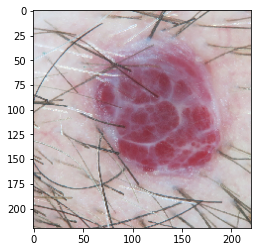

In [32]:
pred('data\Test\\vascular lesion\ISIC_0070723.jpg')

In [14]:
import matplotlib.pyplot as plt

In [15]:
def graph():
    #Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

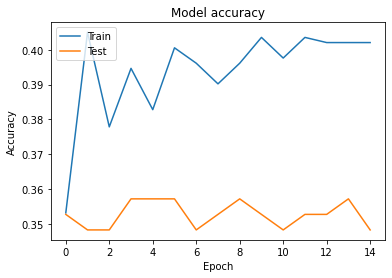

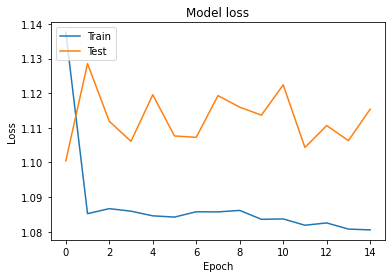

In [16]:
graph()